# Proyecto Final: Statistical Learning II
 * Franz Schubert Castillo Colocho: 22003738.
* Doris Andrea Paz Garcia: 22005266

## Metodología CRISP-DM 
#### 1. Comprensión del negocio: Telecom. 
Somos una compañía dedicada al desarrollo tecnológico de las empresas, brindando soluciones de Conectividad, Cloud, IoT, Datacenter, Seguridad, Comunicaciones y Video & Media para su transformación digital.
#### 1.1 Definición del problema: Predicción de la rotación de clientes en Telecom 
En la industria de las telecomunicaciones, la retención de clientes es un desafío crítico. La pérdida de clientes (o "churn") puede tener un impacto significativo en los ingresos de una empresa. Identificar a los clientes en riesgo de abandonar y entender los factores que contribuyen a esta decisión puede ayudar a la empresa a tomar medidas proactivas para retener a estos clientes.

#### 1.2 Objetivo: Predicción de la rotación de clientes en Telecom 
Desarrollar un modelo predictivo utilizando Redes Neuronales Artificiales (ANN) o Redes Neuronales Recurrentes (RNN) que pueda predecir si un cliente está en riesgo de abandonar la empresa en un futuro cercano. El modelo deberá considerar diversas características del cliente, como el género, la antigüedad, el tipo de contrato, los cargos mensuales, y otros factores relevantes que podrían influir en la decisión de un cliente de dejar la empresa.

#### 1.3 Metricas de exito:
El éxito del proyecto se medirá en términos de la precisión, la sensibilidad, la especificidad, y el área bajo la curva ROC (AUC-ROC) del modelo en la predicción de la rotación de clientes. Además, se considerarán aspectos como la interpretabilidad del modelo y la identificación de las características más influyentes en la predicción del abandono.

In [68]:
#Importamos las librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
#Cargamos data para aplicar analisis de datos
df = pd.read_csv("dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,70.129785
std,0.368612,24.559481,196.846126
min,0.000000,0.000000,0.530000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,10020.000000


In [4]:
#Eliminamos la columna CustomerID 
df = df.drop(columns=['customerID']) # Elimino customerID 


In [5]:
df #Visualizamos el resultado

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### 2. Comprensión de los datos (analisis exploratorio).  

#### 2.1 Familiarización con los datos:  
##### * Tamaño del Conjunto de Datos: 
7043 clientes con 21 características cada uno.
##### * Atributos Disponibles: 
customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn.
Variable Objetivo: Churn (abandono del servicio).
#### 2.2 Evaluación de la calidad de los datos. 
##### * Valores faltantes: 
Identificar y manejar cualquier valor faltante en el conjunto de datos.
##### * outliers:
Analizar y decidir cómo manejar posibles valores atípicos que puedan distorsionar el análisis.
##### * Consistencia de los datos:
Verificar la consistencia y validez de los datos, como asegurarse de que los cargos totales sean coherentes con los cargos mensuales y la antigüedad.
#### 2.3 Exploración de los datos
##### * Estadisticas descriptivas:
Calcular estadísticas como la media, mediana, desviación estándar, etc., para cada característica.
##### * Distribución de la Variable Objetivo:
Analizar la distribución de la variable Churn para entender el balance de clases.
##### * Correlación entre variables:
Analizar la correlación entre diferentes características para entender las relaciones entre ellas.
#### 2.4 Visualización de datos. 
##### * Histogramas y Diagramas de Caja: 
Para entender la distribución de las variables continuas.
##### * Grafico de barras:
Para analizar las distribuciones de variables categóricas.
#### 2.5 Definición de la estructura de los datos.
##### * Tipos de Datos:
Identificar los tipos de datos para cada característica (por ejemplo, categórica, numérica, ordinal).
##### * Transformaciones necesarias:
Identificar cualquier transformación necesaria para preparar los datos para el modelado, como la codificación de variables categóricas.


In [6]:
#Tamaño del conjunto de datos. 
filas, columnas = df.shape

print(f"El conjunto de datos contiene {filas} filas y {columnas} columnas.")

El conjunto de datos contiene 7043 filas y 20 columnas.


In [7]:
#Atributos disponibles
atributos = df.columns

# Imprimir los nombres de las columnas
print("Los atributos disponibles en el conjunto de datos son:")
print(atributos.tolist())

Los atributos disponibles en el conjunto de datos son:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [8]:
df.dtypes  #Revisamos los tipos de datos dentro del dataset. 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object') #Cambiamos el tipo de datos de la variable. 
df.dtypes  #Nuevamente revisamos los tipos de datos dentro del dataset. 

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Valores faltantes
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') #Convertir Total Charges a columna númerica.
df.isnull().sum() #Cantidad de nulos por columna

gender               0
SeniorCitizen        0
Partner              0
Dependents          10
tenure               0
PhoneService         7
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV         17
StreamingMovies     62
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        23
Churn                0
dtype: int64

In [11]:
#Clasificación de los tipos de columna 
def getDataColTypes(df):
    categoricas=[]
    continuas=[]
    discretas=[]
    for colName in df.columns:
        if(df[colName].dtype=='O'): 
            categoricas.append(colName)
        else: 
            if((df[colName].dtype=='int64') or (df[colName].dtypes=='float64')): 
                if(len(df[colName])<=30):
                    discretas.append(colName)
                else: 
                    continuas.append(colName)
    return discretas,continuas,categoricas
discretas,continuas,categoricas = getDataColTypes(df)
print(continuas)
print(discretas)
print(categoricas) 

['tenure', 'MonthlyCharges', 'TotalCharges']
[]
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
#Contamos la cantidad de ocurrencias para analizar las variables categoricas. 

def PlotCatColumn_vrs_Churn(df,colname,Churn):
    plt.figure(figsize=(10,5))
    plot=sns.countplot(x=df[colname],hue=df[Churn])
    plt.title(f'{colname} vrs {Churn}')
    
    for p in plot.patches: 
        plt.annotate(p.get_height(),(p.get_x()+p.get_width()/3,p.get_height()+50))
    
    plt.show()

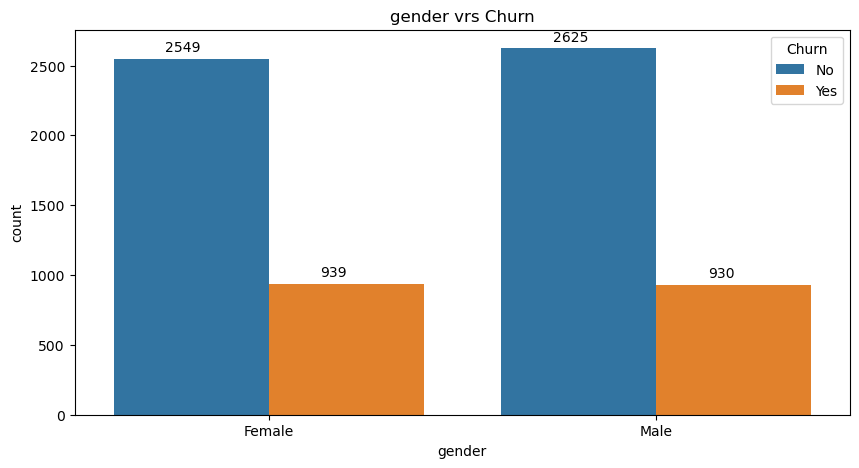

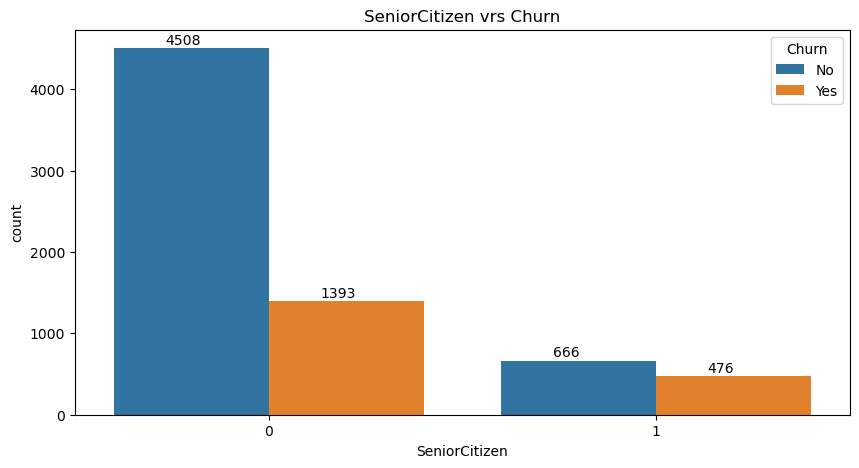

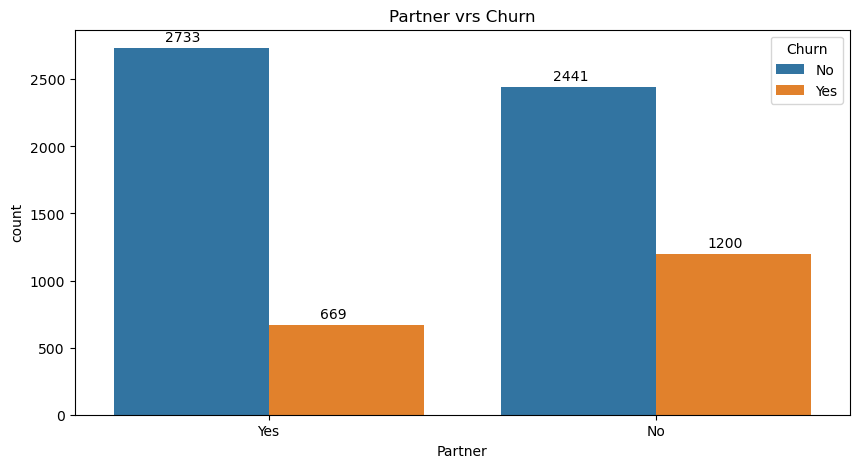

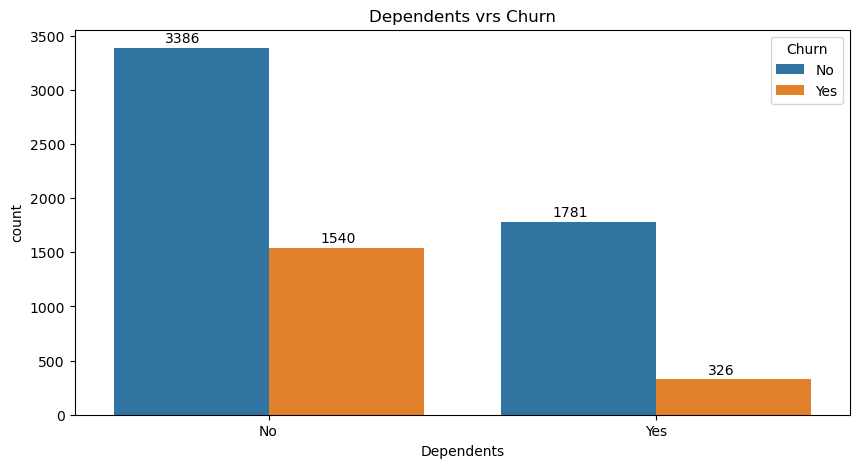

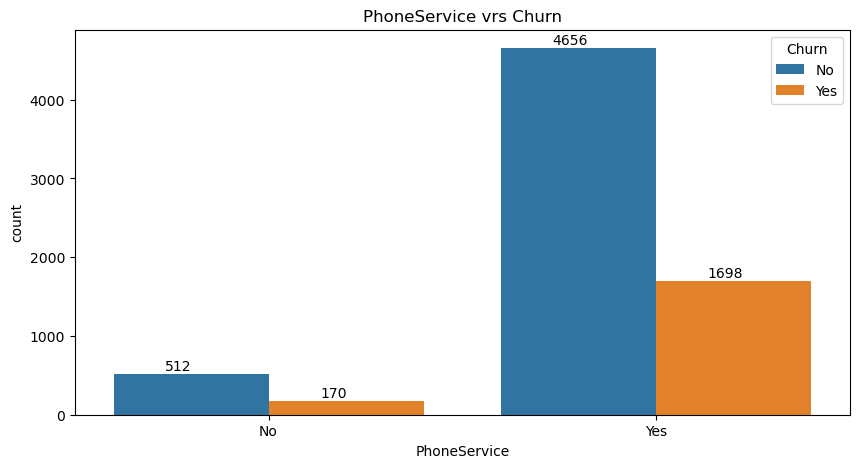

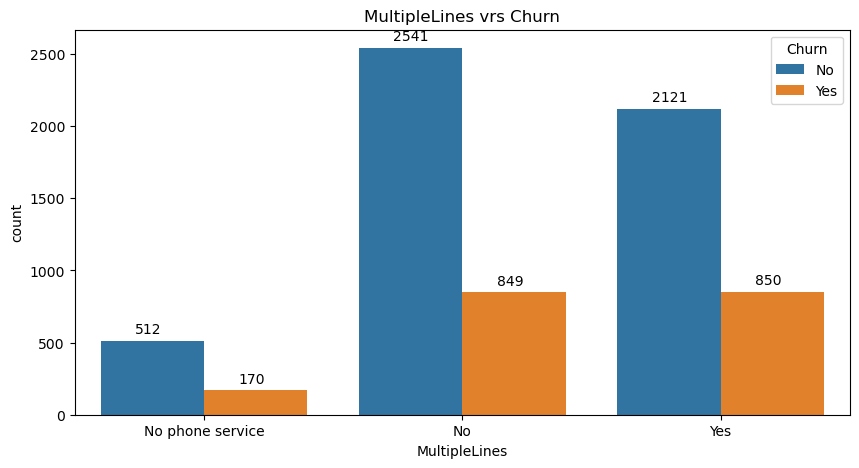

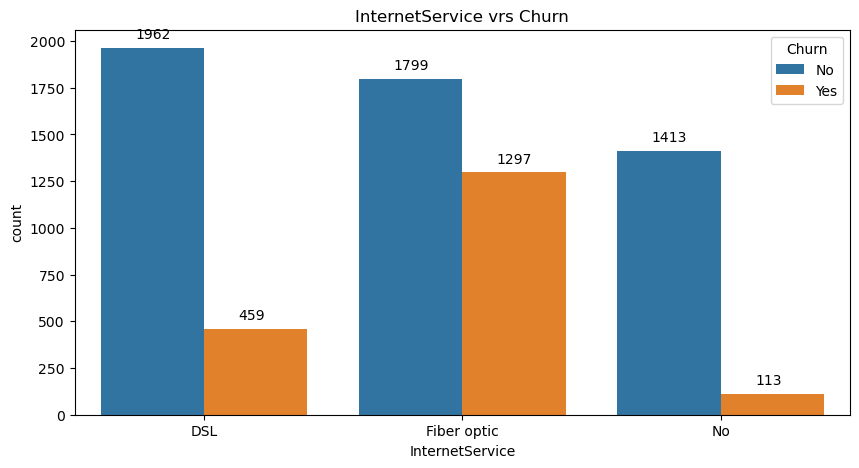

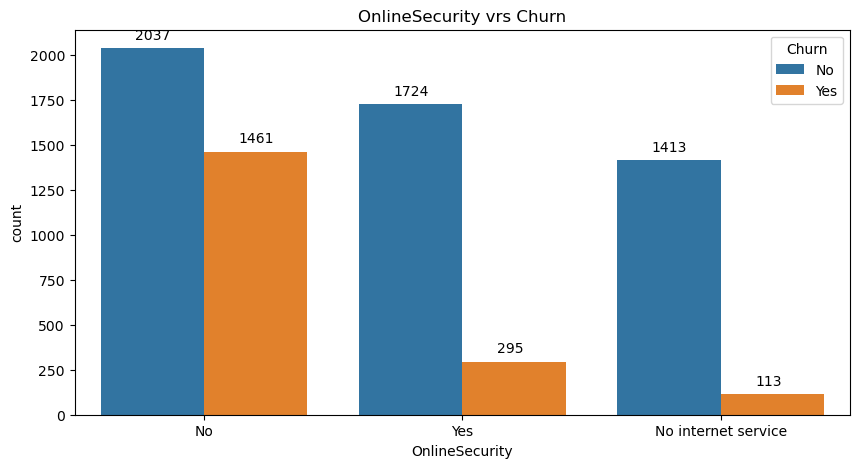

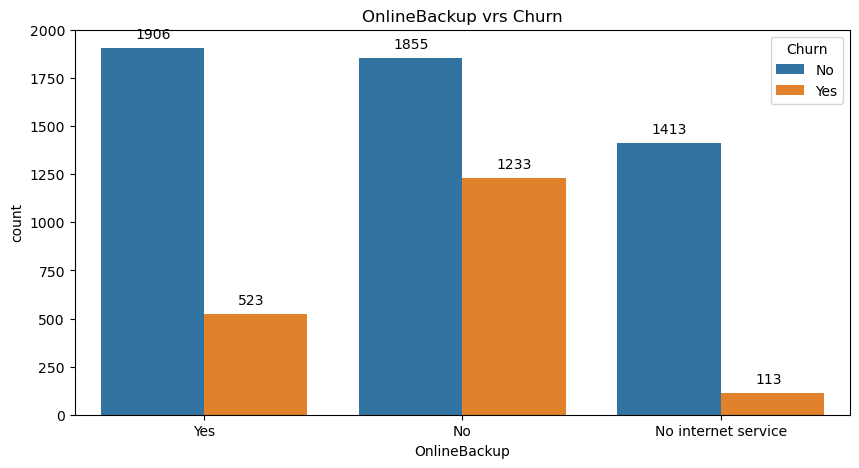

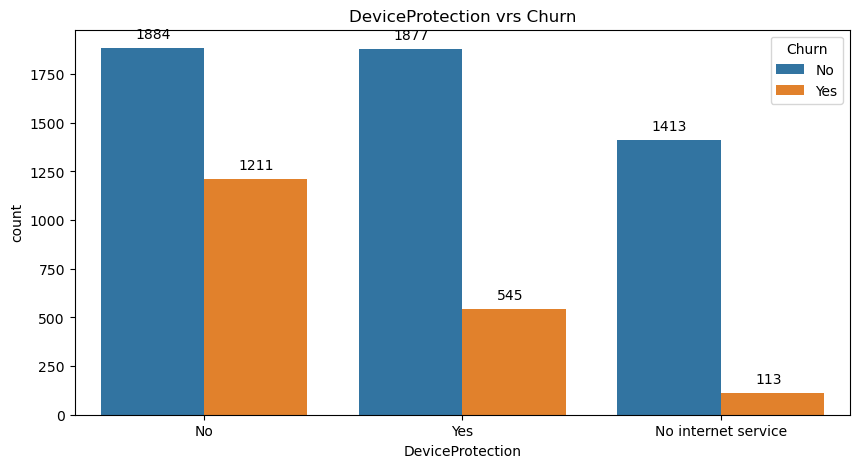

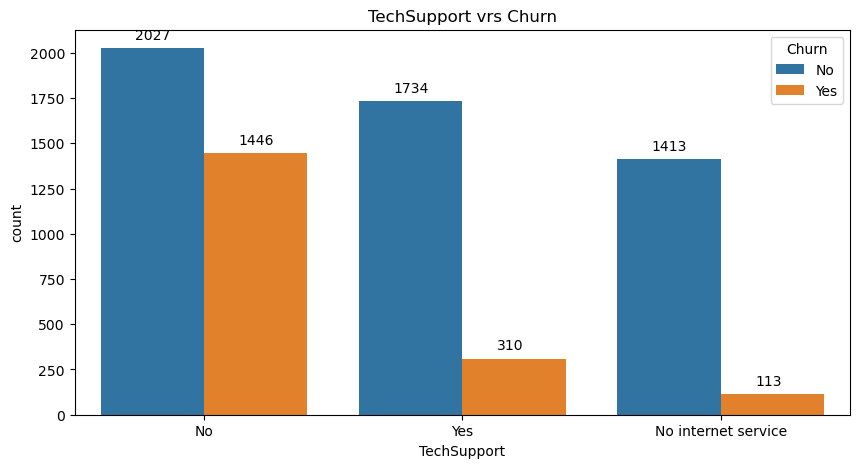

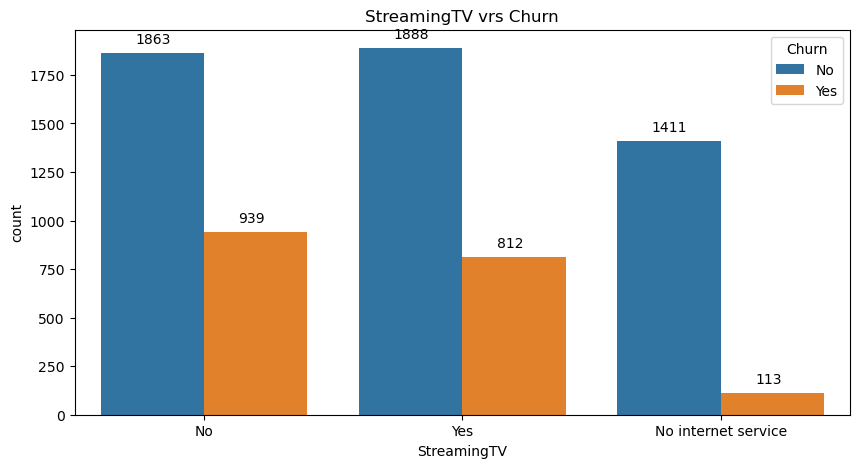

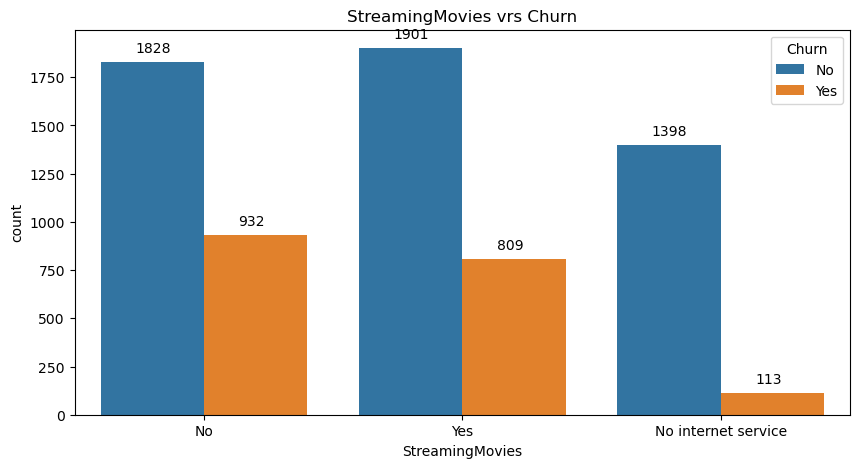

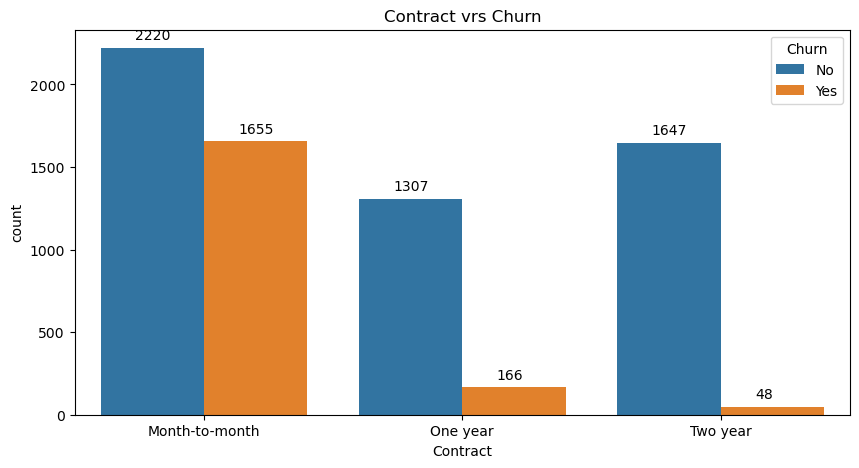

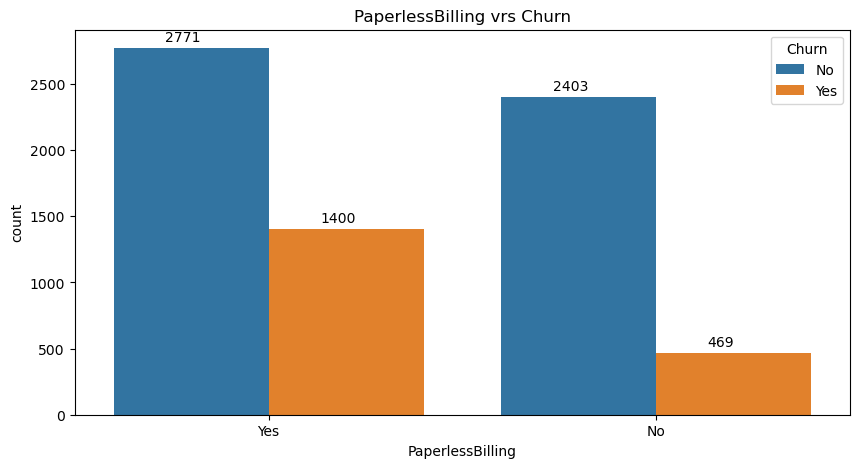

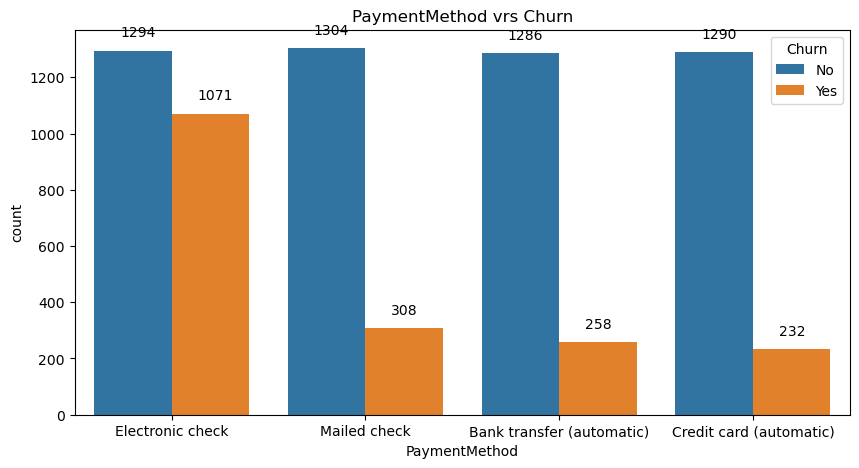

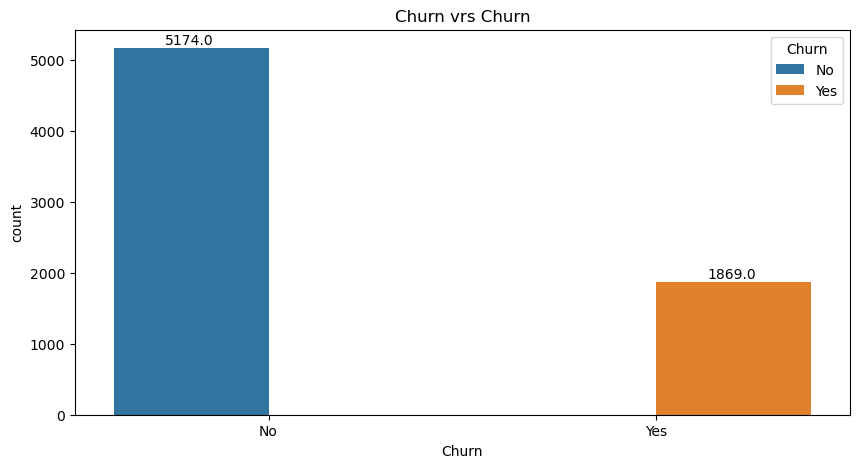

In [13]:
for catCol in categoricas: 
    PlotCatColumn_vrs_Churn(df,catCol,'Churn')
#Importante: Revisar que los datos esten balanceados cuando la variable dependiente es categorica.

In [14]:
#Analizamos variables continuas y también se detectan outliers. 
dataset =df
col='Churn'
def plotDistBoxQQ(dataset,col):
    '''
    Descripción: Muestra las graficas de distribución, Boxplot y QQ-Plot para detectar outliers
    Input: dataset -> pandas dataframe, col -> string con nombre de columna. 
    Output: Visualización de plots.
    '''
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Boxplot")

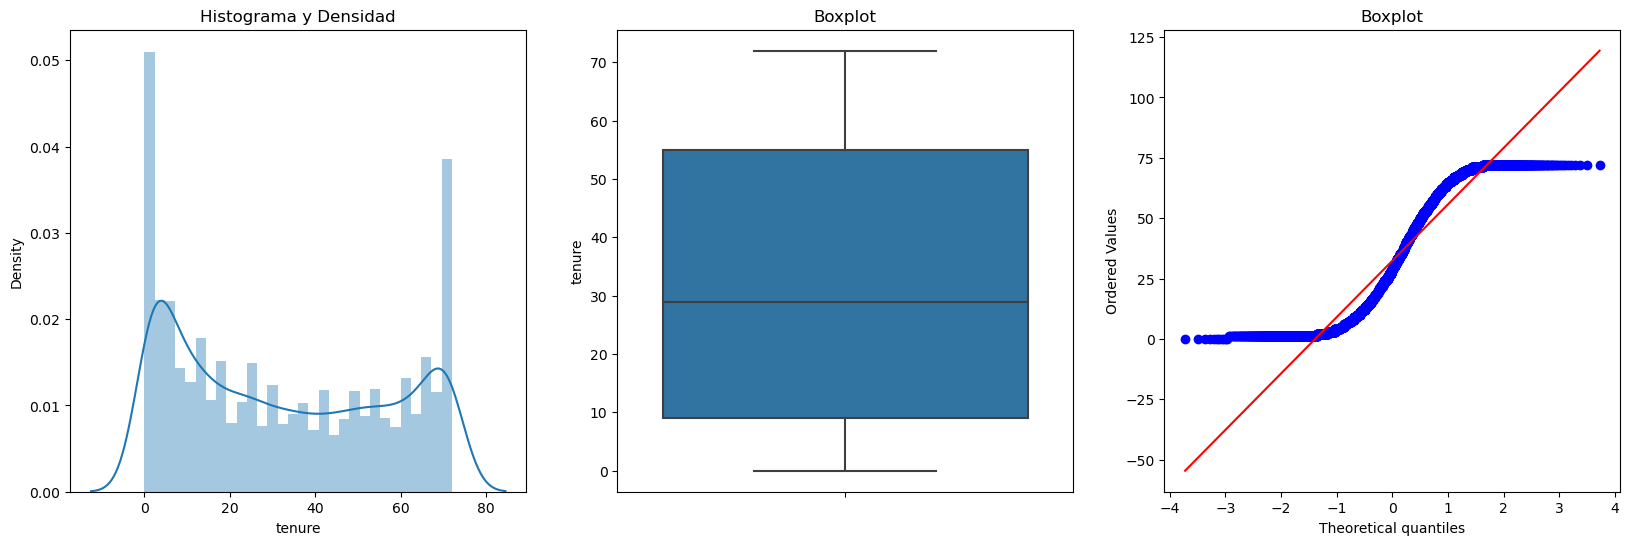

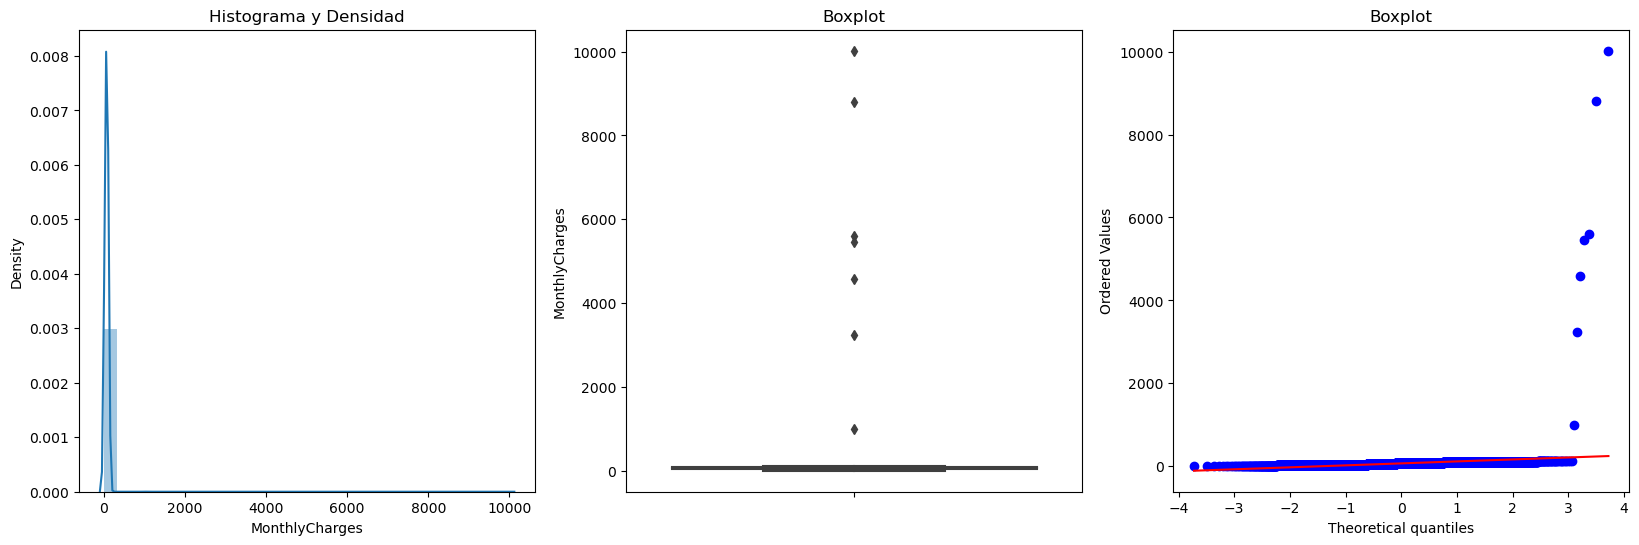

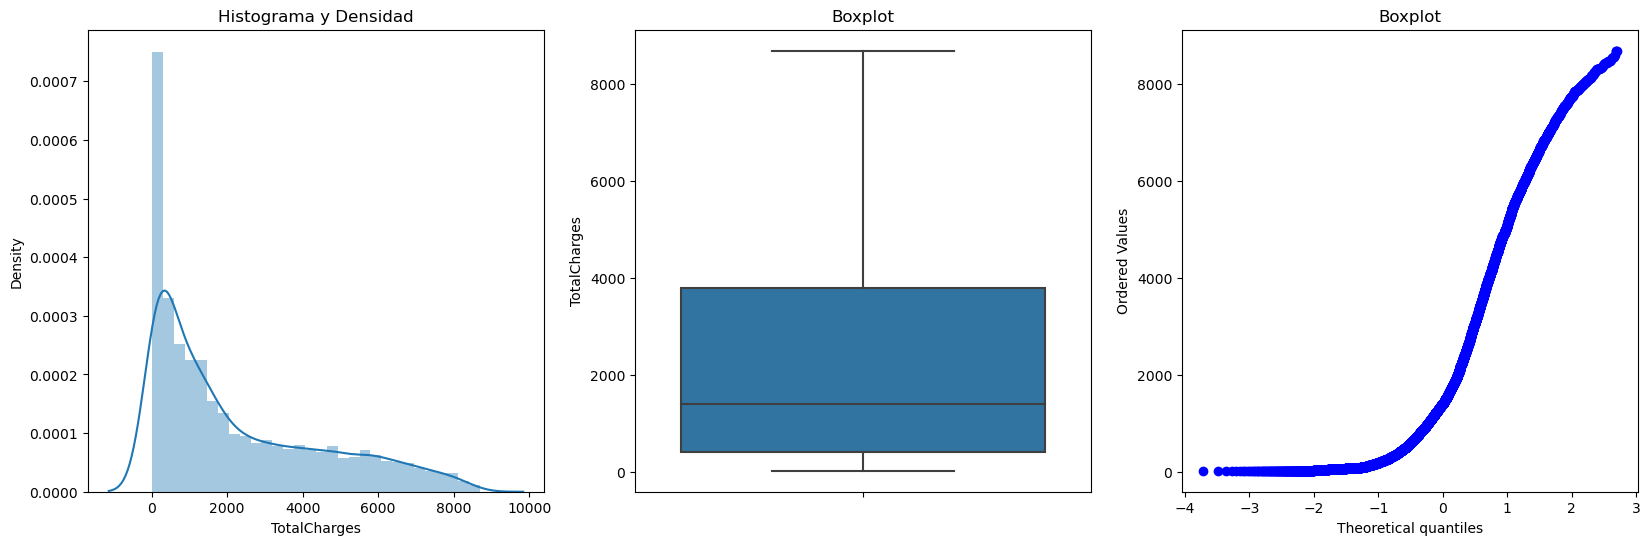

In [15]:
import warnings 
warnings.filterwarnings("ignore")
for col in continuas: 
    plotDistBoxQQ(df,col)

### Preparación de los Datos:
#### Limpieza de Datos:
* Valores Faltantes:

Identificar y manejar cualquier valor faltante en el conjunto de datos, por ejemplo, usando imputación o eliminación.

* Outliers:

Uso de técnicas como IQR y Z-score para identificar y manejar outliers.

* Consistencia de los Datos:

Verificar que los datos son coherentes, como asegurarse de que TotalCharges es coherente con MonthlyCharges y tenure.
#### Transformación de Datos:
* Normalización/Estandarización:

Dependiendo del algoritmo de aprendizaje automático que planeas utilizar, podría ser necesario normalizar o estandarizar las variables numéricas.
Codificación de Variables Categóricas:

Utilizar técnicas como One-Hot Encoding o Label Encoding para codificar variables como gender, PaymentMethod, etc.

* Importancia de Características:

Utilizar algoritmos como  RNN para determinar la importancia de cada característica.
#### División de Datos:
* Conjunto de Entrenamiento y Prueba:

Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba para validar el rendimiento del modelo.
* Balanceo de Clases:

Utilizar técnicas de sobremuestreo o submuestreo para tratar el desequilibrio de clases en la variable Churn.

### valores faltantes 

In [16]:
# Eliminamos los faltantes. 
df.dropna(inplace = True)
filas, columnas = df.shape

print(f"El conjunto de datos contiene {filas} filas y {columnas} columnas.")

El conjunto de datos contiene 6931 filas y 20 columnas.


#### Capping para tratar outliers

In [17]:
#función para detectar límites de outliers
def detectOutliersLimits(dataset,col):
    '''
    Descripción: Calcula los limites superiores e inferiores para detección de outliers. 
    Input: dataset->pandas dataframe, col->string nombre de columna
    Output: tupla de floats con los limites superior e inferior (LI,LS)
    '''
    IQR = dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)
    return LI,LS

# Lista de columnas continuas.
columnas_continuas = ['MonthlyCharges', 'TotalCharges', 'tenure']  

# Aplicar capping en cada columna
for col in columnas_continuas:
    LI, LS = detectOutliersLimits(df, col)
    df[col] = np.where(df[col] < LI, LI, df[col])
    df[col] = np.where(df[col] > LS, LS, df[col])


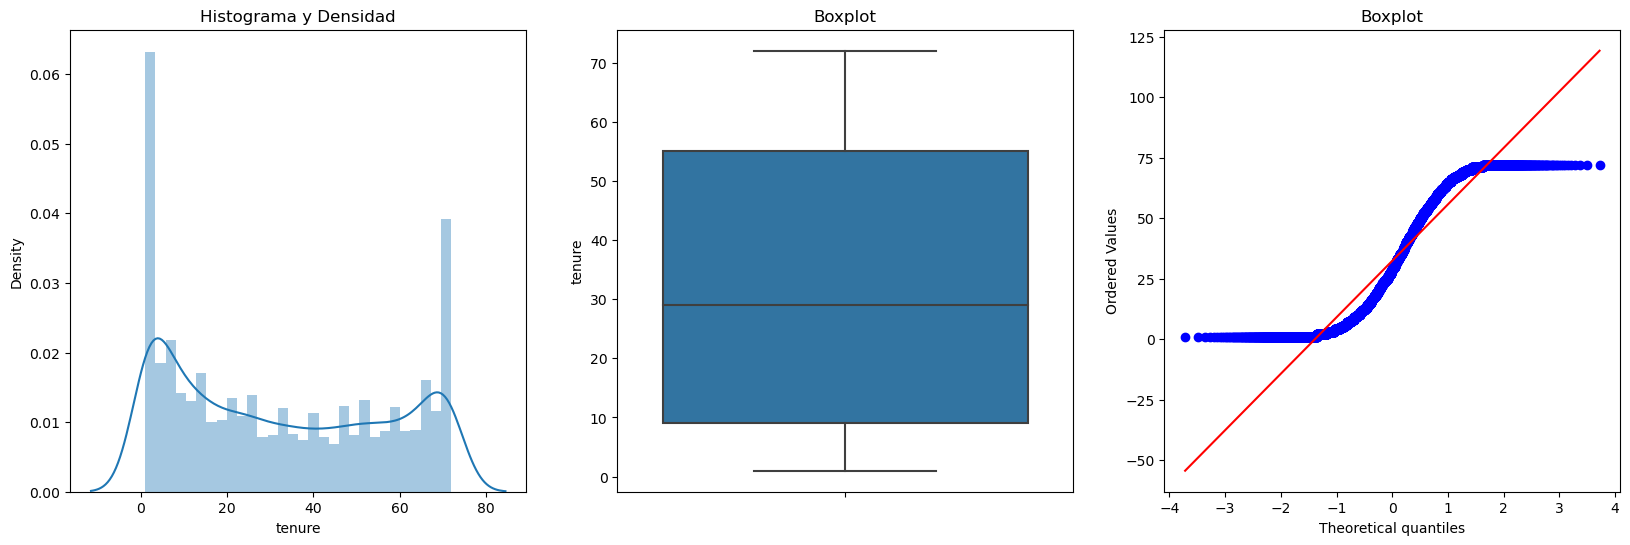

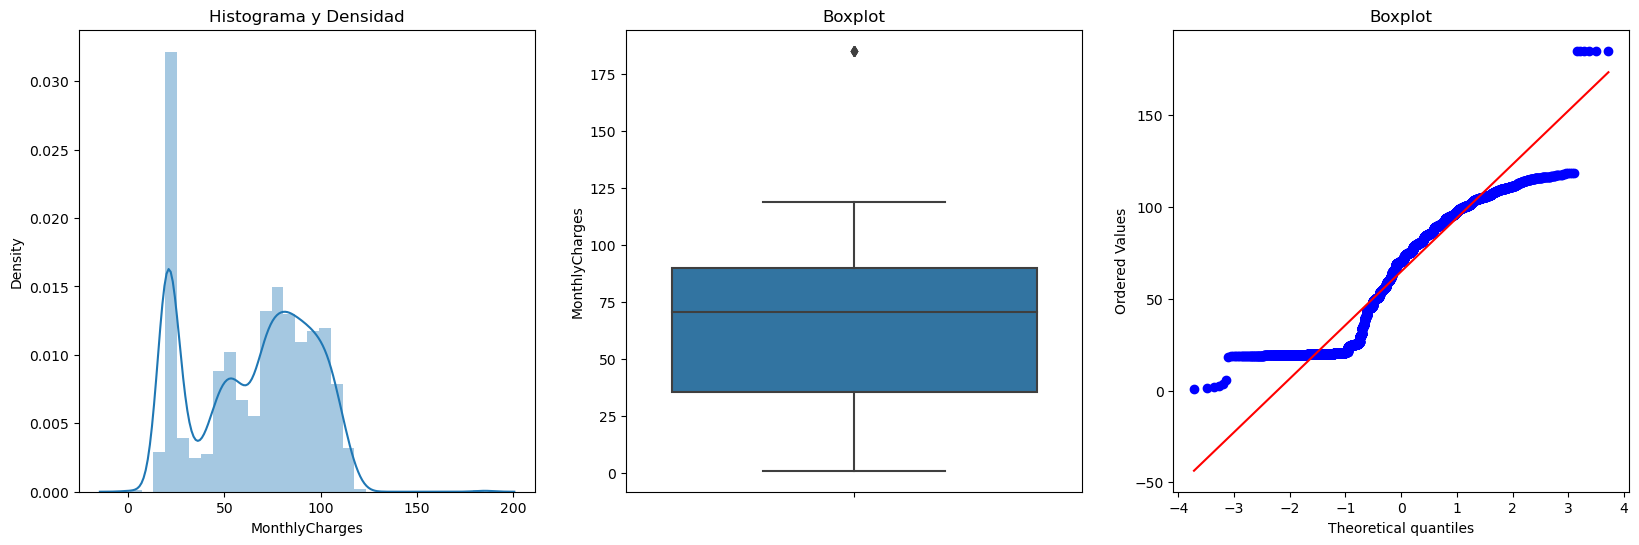

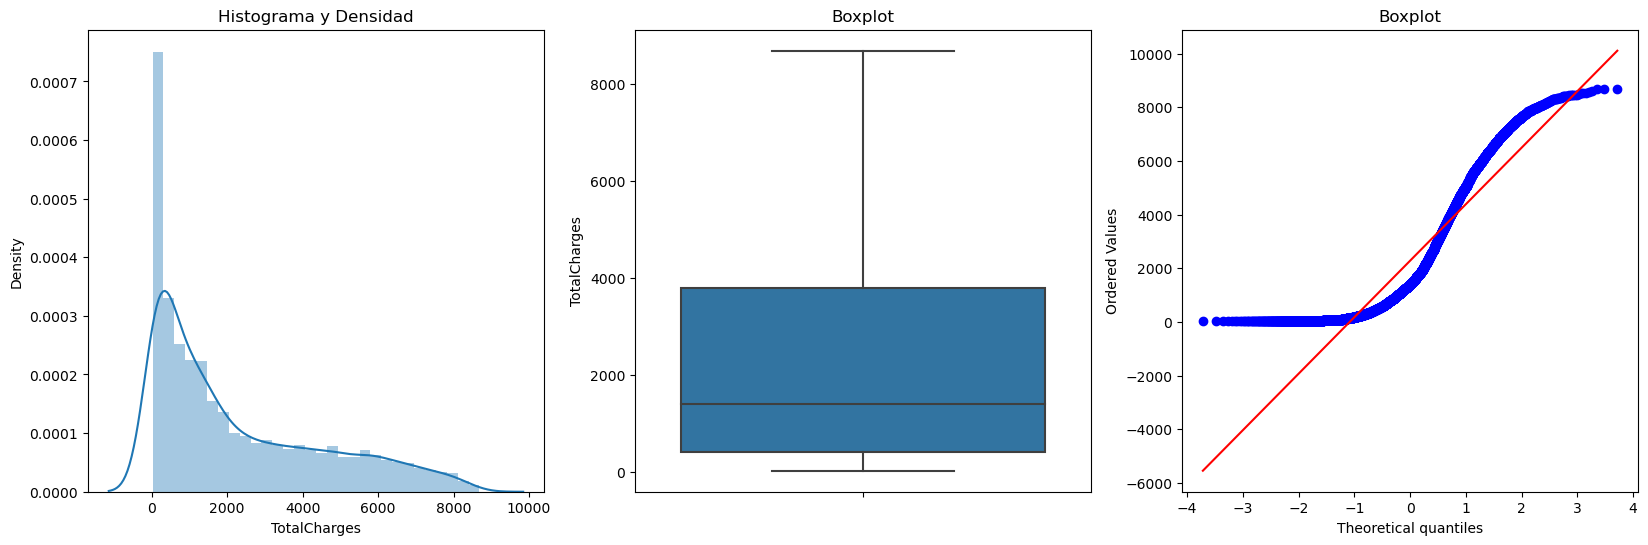

In [18]:
for col in continuas: 
    plotDistBoxQQ(df,col)

### Observamos el analisis descriptivo 


In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,6931.000000,6931.000000,6931.000000
mean,32.396624,64.846319,2283.139828
std,24.531938,30.332147,2267.219688
min,1.000000,0.889000,18.800000
25%,9.000000,35.500000,401.200000
50%,29.000000,70.350000,1396.900000
75%,55.000000,89.900000,3786.600000
max,72.000000,185.100000,8684.800000


### Balanceo de datos

In [20]:
df['Churn'].value_counts()

No     5087
Yes    1844
Name: Churn, dtype: int64

### Balanceamos el "Yes" con respecto al "No". 

In [21]:
# Separar las clases
df_majority = df[df.Churn == 'No']
df_minority = df[df.Churn == 'Yes']

# Sobremuestrear la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Muestreo con reemplazo
                                 n_samples=1869*2, # Duplicar la cantidad de la clase mayoritaria
                                 random_state=42)  # reproducibilidad

# Eliminamos las filas que tenían la clase 'Yes' en el DataFrame original
df.drop(df[df.Churn == 'Yes'].index, inplace=True)

# Añadir las muestras sobremuestreadas al DataFrame original
df = pd.concat([df, df_minority_upsampled], ignore_index=True)

# Mostrar la nueva distribución de clases
print(df.Churn.value_counts())


No     5087
Yes    3738
Name: Churn, dtype: int64


### Codificación de variables categoricas (Label Encoding)

In [22]:
# Inicializar LabelEncoder
labelencoder = LabelEncoder()

# Supongamos que `df` es tu DataFrame y `categoricas` es la lista de columnas categóricas que obtuviste antes
for col in categoricas:
    df[col] = labelencoder.fit_transform(df[col])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
3,1,0,0,1,22.0,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
4,0,0,0,0,10.0,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,1,1,0,0,32.0,1,2,1,0,0,0,0,2,2,0,1,1,96.15,3019.25,1
8821,1,0,0,0,11.0,1,0,1,0,2,0,0,0,0,0,0,2,74.95,815.50,1
8822,1,0,1,0,5.0,1,2,1,0,2,0,0,0,0,0,1,2,78.75,412.10,1
8823,0,0,1,1,2.0,1,0,1,0,0,0,0,0,0,0,0,2,70.40,147.15,1


### Correlación entre variables. 

In [23]:
corr_matrix = df.corr()


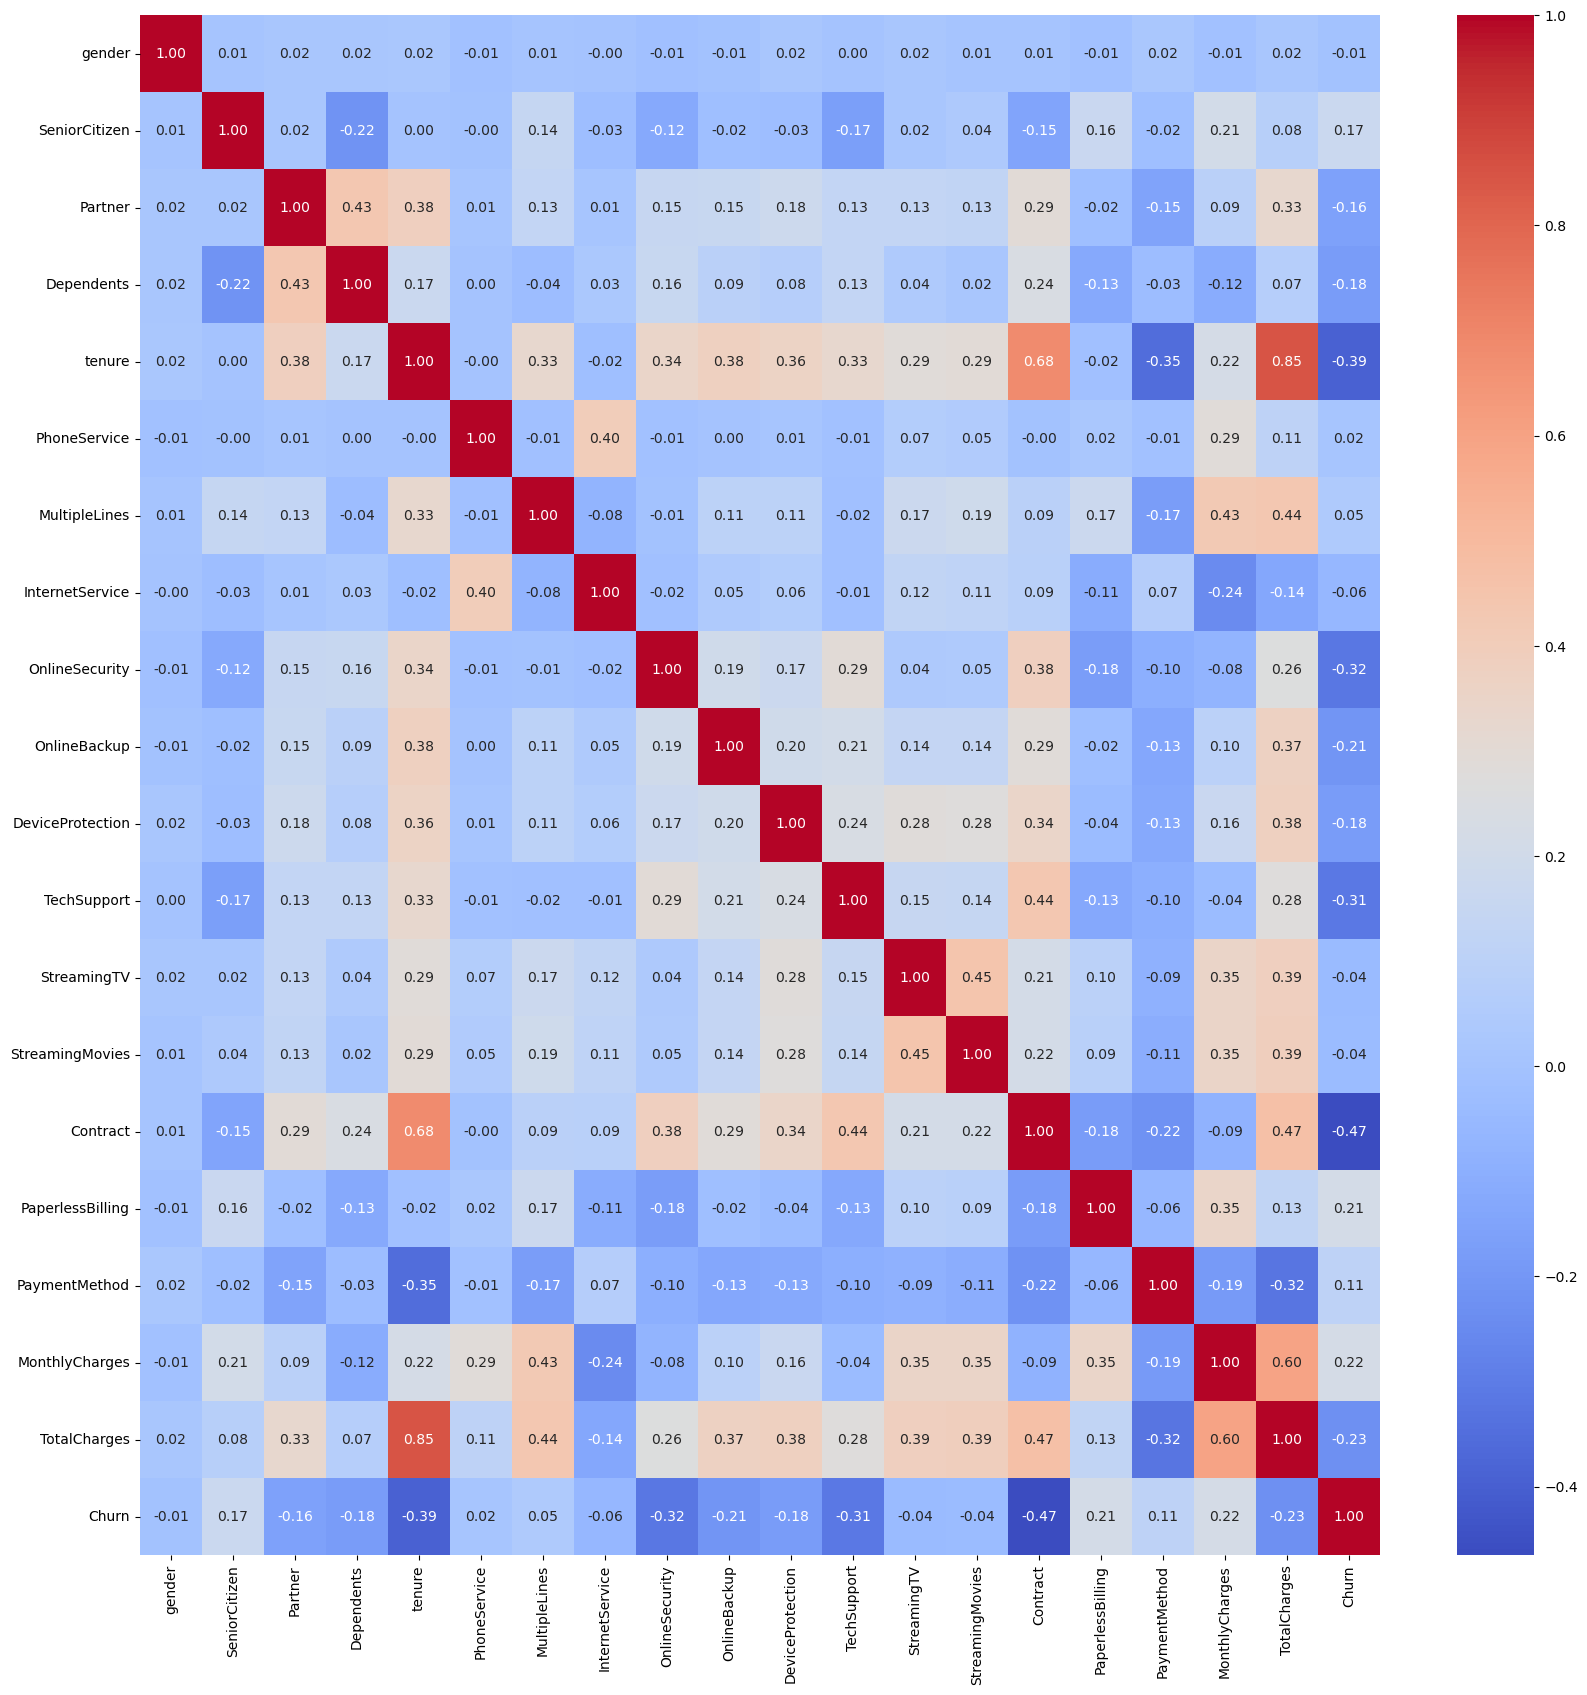

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


#### 4.1 Train Test Split para Entrenamiento y Prueba

In [25]:
# Definir características y la variable objetivo
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [26]:
# Para el conjunto de entrenamiento
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Para el conjunto de prueba
print("Distribución de clases en el conjunto de prueba:")
print(y_test.value_counts())


Distribución de clases en el conjunto de entrenamiento:
0    3549
1    2628
Name: Churn, dtype: int64
Distribución de clases en el conjunto de prueba:
0    1538
1    1110
Name: Churn, dtype: int64


#### 4. Modelado con Redes Neuronales: Aplicación de ANN y RNN

##### Selección del Modelo Neuronal

* Tipo de Red: Dependiendo del problema que estemos abordando (por ejemplo, predicción financiera, análisis de series temporales, reconocimiento de patrones, etc.), elegimos entre una Red Neuronal Artificial (ANN) o una Red Neuronal Recurrente (RNN).
* Comparación de Arquitecturas: Similar a otros algoritmos de aprendizaje automático, podemos empezar con una arquitectura de red básica y luego experimentar con diferentes números de capas, nodos y funciones de activación.

##### Ajuste y Afinamiento de Parámetros
* Optimización de Hiperparámetros: Utilizamos técnicas como Grid Search o Random Search específicas para redes neuronales para encontrar la mejor combinación de hiperparámetros, como la tasa de aprendizaje, el número de épocas y el tamaño del lote.
* Validación: Una vez que se ha seleccionado el modelo, lo evaluamos en un conjunto de datos de validación que no se ha visto antes para asegurar que el modelo generaliza bien a nuevos datos.
##### Experimentación y Optimización

* Técnicas de Regularización: Para evitar el sobreajuste, podríamos experimentar con técnicas de regularización como Dropout o Batch Normalization.
* Ensamblajes y Boosting: Para mejorar aún más el rendimiento, podríamos ensamblar múltiples redes o utilizar técnicas de boosting especializadas para redes neuronales.
##### Evaluación de Métricas 

* Métricas de Evaluación: métricas convencionales como precisión. 


#### Prueba No.1 ~  ANN Simple

In [27]:
# Inicializar la ANN
model = Sequential()

# Agregar la capa de entrada y la primera capa oculta
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

# Agregar una segunda capa oculta
model.add(Dense(units=8, activation='relu'))

# Agregar la capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilar la ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la ANN en el conjunto de entrenamiento
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
194/194 [==============================] - 1s 1ms/step - loss: 56.5570 - accuracy: 0.5702
Epoch 2/50
194/194 [==============================] - 0s 1ms/step - loss: 1.9058 - accuracy: 0.5559
Epoch 3/50
194/194 [==============================] - 0s 1ms/step - loss: 0.9696 - accuracy: 0.6379
Epoch 4/50
194/194 [==============================] - 0s 1ms/step - loss: 0.8479 - accuracy: 0.6918
Epoch 5/50
194/194 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.6963
Epoch 6/50
194/194 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.7165
Epoch 7/50
194/194 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.7159
Epoch 8/50
194/194 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.7079
Epoch 9/50
194/194 [==============================] - 0s 1ms/step - loss: 1.0303 - accuracy: 0.6895
Epoch 10/50
194/194 [==============================] - 0s 2ms/step - loss: 0.7920 - accuracy: 0.710

In [28]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')


83/83 [==============================] - 0s 2ms/step - loss: 0.8260 - accuracy: 0.6420
Pérdida en el conjunto de prueba: 0.8260344862937927
Precisión en el conjunto de prueba: 0.6419939398765564


In [29]:
# Guardar el modelo en formato HDF5
model.save('mi_modelo.h5')


### Prueba No.2 ~ ANN con Optimizador

In [32]:
# Inicializar la ANN
model = Sequential()

# Agregar la capa de entrada y la primera capa oculta con regularización L2
model.add(Dense(units=32, activation='relu', kernel_regularizer='l2', input_dim=X_train.shape[1]))

# Agregar una capa de Dropout
model.add(Dropout(0.5))

# Agregar una segunda capa oculta
model.add(Dense(units=16, activation='relu'))

# Agregar la capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilar la ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la ANN en el conjunto de entrenamiento
model.fit(X_train, y_train, batch_size=64, epochs=100)


Epoch 1/100
97/97 [==============================] - 1s 2ms/step - loss: 44.1896 - accuracy: 0.5284
Epoch 2/100
97/97 [==============================] - 0s 2ms/step - loss: 20.5701 - accuracy: 0.5716
Epoch 3/100
97/97 [==============================] - 0s 2ms/step - loss: 13.0808 - accuracy: 0.5734
Epoch 4/100
97/97 [==============================] - 0s 2ms/step - loss: 7.6399 - accuracy: 0.5940
Epoch 5/100
97/97 [==============================] - 0s 2ms/step - loss: 4.8789 - accuracy: 0.5971
Epoch 6/100
97/97 [==============================] - 0s 2ms/step - loss: 3.2017 - accuracy: 0.6113
Epoch 7/100
97/97 [==============================] - 0s 2ms/step - loss: 2.3749 - accuracy: 0.6058
Epoch 8/100
97/97 [==============================] - 0s 2ms/step - loss: 1.8466 - accuracy: 0.6158
Epoch 9/100
97/97 [==============================] - 0s 2ms/step - loss: 1.4983 - accuracy: 0.6255
Epoch 10/100
97/97 [==============================] - 0s 2ms/step - loss: 1.2326 - accuracy: 0.6251
Epoch 

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


83/83 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.6782
Test Loss: 0.5981283783912659
Test Accuracy: 0.6782477498054504


### Encontrar el modelo ideal ANN con experimentación 

### Prueba No.3 ~ Variar el número de capas

In [36]:
num_layers_range = range(1, 11)  # Desde 1 hasta 10 capas
accuracies = []
losses = []

for num_layers in num_layers_range:
    # Inicializar el modelo
    model = Sequential()
    
    # Capa de entrada
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    
    # Capas ocultas
    for _ in range(num_layers):
        model.add(Dense(units=8, activation='relu'))
    
    # Capa de salida
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluación del modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados
    accuracies.append(accuracy)
    losses.append(loss)

# Imprimir los resultados
for num_layers, acc, loss in zip(num_layers_range, accuracies, losses):
    print(f"Número de capas ocultas: {num_layers}, Precisión: {acc:.4f}, Pérdida: {loss:.4f}")


Número de capas ocultas: 1, Precisión: 0.7372, Pérdida: 0.6298
Número de capas ocultas: 2, Precisión: 0.6952, Pérdida: 1.2193
Número de capas ocultas: 3, Precisión: 0.7160, Pérdida: 0.7812
Número de capas ocultas: 4, Precisión: 0.7481, Pérdida: 0.4944
Número de capas ocultas: 5, Precisión: 0.7462, Pérdida: 0.5010
Número de capas ocultas: 6, Precisión: 0.7451, Pérdida: 0.4913
Número de capas ocultas: 7, Precisión: 0.6635, Pérdida: 0.5731
Número de capas ocultas: 8, Precisión: 0.7481, Pérdida: 0.5064
Número de capas ocultas: 9, Precisión: 0.7542, Pérdida: 0.4812
Número de capas ocultas: 10, Precisión: 0.7526, Pérdida: 0.4939


### Prueba No.4 ~ variar el número de neuronas

In [37]:
# Rango de neuronas a probar, desde 10 hasta 1000 en escala logarítmica
neuron_range = [10, 30, 100, 300, 1000]  

accuracies = []
losses = []

for neurons in neuron_range:
    # Inicializar el modelo
    model = Sequential()
    
    # Capa de entrada
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    
    # Capa oculta con 'neurons' número de neuronas
    model.add(Dense(units=neurons, activation='relu'))
    
    # Capa de salida
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluación del modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados
    accuracies.append(accuracy)
    losses.append(loss)

# Imprimir los resultados
for neurons, acc, loss in zip(neuron_range, accuracies, losses):
    print(f"Número de neuronas: {neurons}, Precisión: {acc:.4f}, Pérdida: {loss:.4f}")


Número de neuronas: 10, Precisión: 0.7202, Pérdida: 0.8073
Número de neuronas: 30, Precisión: 0.7610, Pérdida: 0.5430
Número de neuronas: 100, Precisión: 0.5963, Pérdida: 0.9816
Número de neuronas: 300, Precisión: 0.6235, Pérdida: 0.7269
Número de neuronas: 1000, Precisión: 0.7436, Pérdida: 0.5419


### Prueba No.5 ~ variar el número de epocas.

In [38]:
# Rango de épocas a probar, en escala logarítmica
epoch_range = [10, 30, 100, 300, 1000, 3000, 5000]

accuracies = []
losses = []

for epochs in epoch_range:
    # Inicializar el modelo
    model = Sequential()
    
    # Capa de entrada
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    
    # Capa oculta
    model.add(Dense(units=8, activation='relu'))
    
    # Capa de salida
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluación del modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados
    accuracies.append(accuracy)
    losses.append(loss)

# Imprimir los resultados
for epochs, acc, loss in zip(epoch_range, accuracies, losses):
    print(f"Número de épocas: {epochs}, Precisión: {acc:.4f}, Pérdida: {loss:.4f}")


Número de épocas: 10, Precisión: 0.6390, Pérdida: 0.9279
Número de épocas: 30, Precisión: 0.7685, Pérdida: 0.4886
Número de épocas: 100, Precisión: 0.6767, Pérdida: 0.6240
Número de épocas: 300, Precisión: 0.7594, Pérdida: 0.4940
Número de épocas: 1000, Precisión: 0.7625, Pérdida: 0.4876
Número de épocas: 3000, Precisión: 0.7625, Pérdida: 0.6074
Número de épocas: 5000, Precisión: 0.7572, Pérdida: 0.4828


### Prueba No.6 ~ variar el número de lotes

In [39]:
# Tamaños de batch a probar, en escala logarítmica
batch_size_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10000]

accuracies = []
losses = []

for batch_size in batch_size_range:
    # Inicializar el modelo
    model = Sequential()
    
    # Capa de entrada
    model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
    
    # Capa oculta
    model.add(Dense(units=8, activation='relu'))
    
    # Capa de salida
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluación del modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados
    accuracies.append(accuracy)
    losses.append(loss)

# Imprimir los resultados
for batch_size, acc, loss in zip(batch_size_range, accuracies, losses):
    print(f"Tamaño del batch: {batch_size}, Precisión: {acc:.4f}, Pérdida: {loss:.4f}")


Tamaño del batch: 1, Precisión: 0.7526, Pérdida: 0.4932
Tamaño del batch: 2, Precisión: 0.7470, Pérdida: 0.4995
Tamaño del batch: 4, Precisión: 0.7549, Pérdida: 0.4889
Tamaño del batch: 8, Precisión: 0.7560, Pérdida: 0.4812
Tamaño del batch: 16, Precisión: 0.7576, Pérdida: 0.4819
Tamaño del batch: 32, Precisión: 0.7360, Pérdida: 0.5032
Tamaño del batch: 64, Precisión: 0.7326, Pérdida: 0.5339
Tamaño del batch: 128, Precisión: 0.7523, Pérdida: 0.4890
Tamaño del batch: 256, Precisión: 0.7474, Pérdida: 0.4966
Tamaño del batch: 512, Precisión: 0.7553, Pérdida: 0.4939
Tamaño del batch: 1024, Precisión: 0.7409, Pérdida: 0.5147
Tamaño del batch: 2048, Precisión: 0.6730, Pérdida: 0.7580
Tamaño del batch: 4096, Precisión: 0.6103, Pérdida: 1.0122
Tamaño del batch: 8192, Precisión: 0.6658, Pérdida: 1.4601
Tamaño del batch: 10000, Precisión: 0.5925, Pérdida: 12.1849


### Prueba No. 7 ~ Con los resultados anteriores formamos un nuevo modelo 

In [44]:
# Número de características en X_train
input_dim = X_train.shape[1]

# Inicializar la ANN
model_ideal = Sequential()

# Capa de entrada y la primera capa oculta con 30 neuronas
model_ideal.add(Dense(units=30, activation='relu', input_dim=input_dim))

# Agregar capas ocultas adicionales (5 capas ocultas como ejemplo, puedes probar con un número entre 4 y 9)
for _ in range(5):
    model_ideal.add(Dense(units=30, activation='relu'))

# Agregar la capa de salida
model_ideal.add(Dense(units=1, activation='sigmoid'))  # Suponiendo que es una clasificación binaria

# Compilar la ANN
model_ideal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la ANN en el conjunto de entrenamiento
# Utilizamos 30 épocas y un tamaño de batch de 8 como un punto de partida
model_ideal.fit(X_train, y_train, batch_size=8, epochs=30, verbose=0)

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model_ideal.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")



Pérdida en el conjunto de prueba: 0.49471884965896606
Precisión en el conjunto de prueba: 0.7469788789749146


### Prueba No. 8 ~ Nos pasamos a RNN 

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Suponiendo que X_train y y_train son DataFrames, los convertimos a NumPy arrays
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

# Lo mismo para el conjunto de prueba
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

# Remodelar los datos para que sean compatibles con una RNN
X_train_rnn = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_rnn = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Número de características en X_train
input_dim = X_train_rnn.shape[2]

# Inicializar la RNN
model_rnn = Sequential()

# Añadir la capa RNN con 30 unidades
model_rnn.add(SimpleRNN(30, activation='relu', input_shape=(1, input_dim)))

# Añadir la capa de salida
model_rnn.add(Dense(1, activation='sigmoid'))  # 'sigmoid' para clasificación binaria

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_rnn.fit(X_train_rnn, y_train_array, epochs=30, batch_size=8, verbose=0)

# Evaluar el modelo
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test_array, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")


Pérdida en el conjunto de prueba: 1.6143637895584106
Precisión en el conjunto de prueba: 0.7205438017845154


### Prueba No. 9 ~ RNN con LSTM 

In [62]:
from tensorflow.keras.layers import LSTM, Dropout

# Inicializar la RNN
model_lstm = Sequential()

# Añadir la capa LSTM con 50 unidades y regularización dropout
model_lstm.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(1, input_dim)))
model_lstm.add(Dropout(0.2))

# Segunda capa LSTM
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))

# Tercera capa LSTM
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))

# Añadir la capa de salida
model_lstm.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_lstm.fit(X_train_rnn, y_train_array, epochs=100, batch_size=32, verbose=0)

# Evaluar el modelo
loss, accuracy = model_lstm.evaluate(X_test_rnn, y_test_array, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")


Pérdida en el conjunto de prueba: 0.5064775347709656
Precisión en el conjunto de prueba: 0.7409365773200989


### Prueba No.10 ~ RNN con GRU 

In [67]:
# Número de características en X_train
input_dim = X_train_rnn.shape[2]  # Asumiendo que la forma es (n_muestras, n_pasos_temporales, n_características)

# Inicializar la RNN
model_gru = Sequential()

# Primera capa GRU con 30 unidades y regularización dropout
model_gru.add(GRU(30, return_sequences=True, activation='relu', input_shape=(None, input_dim)))  # None indica número variable de pasos en el tiempo
model_gru.add(Dropout(0.2))

# Segunda capa GRU
model_gru.add(GRU(30, return_sequences=True))
model_gru.add(Dropout(0.2))

# Tercera capa GRU
model_gru.add(GRU(30))
model_gru.add(Dropout(0.2))

# Capa de salida
model_gru.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Entrenar el modelo
model_gru.fit(X_train_rnn, y_train_array, epochs=30, batch_size=16, verbose=0, callbacks=[early_stop], validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model_gru.evaluate(X_test_rnn, y_test_array, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")


Pérdida en el conjunto de prueba: 0.5361365675926208
Precisión en el conjunto de prueba: 0.7122356295585632


### Prueba No.11 Vamos a dejar iguales ambas clases en el target e intentar correr nuevamente el modelo que mejor resultado a dado. 

In [74]:
from sklearn.utils import resample
import pandas as pd

# Imprimir el recuento original de clases
print("Recuento original de clases:\n", df['Churn'].value_counts())

# Separar las clases
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]

# Imprimir para asegurarnos de que las clases están separadas correctamente
print("Recuento de la clase mayoritaria:\n", df_majority['Churn'].value_counts())
print("Recuento de la clase minoritaria:\n", df_minority['Churn'].value_counts())

# Realizar el sobremuestreo de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority), # para igualar la clase mayoritaria
                                 random_state=42) # reproducible results

# Imprimir para asegurarnos de que el sobremuestreo funcionó
print("Recuento de la clase minoritaria después del sobremuestreo:\n", df_minority_upsampled['Churn'].value_counts())

# Combinar la clase mayoritaria con la minoritaria sobremuestreada
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Imprimir el nuevo recuento de clases
print("Recuento de clases en el nuevo DataFrame equilibrado:\n", df_balanced['Churn'].value_counts())


Recuento original de clases:
 0    5087
1    3738
Name: Churn, dtype: int64
Recuento de la clase mayoritaria:
 0    5087
Name: Churn, dtype: int64
Recuento de la clase minoritaria:
 1    3738
Name: Churn, dtype: int64
Recuento de la clase minoritaria después del sobremuestreo:
 1    5087
Name: Churn, dtype: int64
Recuento de clases en el nuevo DataFrame equilibrado:
 0    5087
1    5087
Name: Churn, dtype: int64


### Modelo ideal ANN 

In [81]:
from sklearn.model_selection import train_test_split

# Asumiendo que df_balanced es tu DataFrame y 'Churn' es tu variable objetivo
X = df_balanced.drop('Churn', axis=1)  # Características
y = df_balanced['Churn']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ahora X_train, y_train, X_test y y_test deben ser utilizados para entrenar y evaluar tu modelo


In [82]:
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())


Distribución de clases en el conjunto de entrenamiento:
1    4070
0    4069
Name: Churn, dtype: int64


In [83]:
print("Distribución de clases en el conjunto de prueba:")
print(y_test.value_counts())


Distribución de clases en el conjunto de prueba:
0    1018
1    1017
Name: Churn, dtype: int64


In [84]:
# Número de características en X_train
input_dim = X_train.shape[1]

# Inicializar la ANN
model_ideal = Sequential()

# Capa de entrada y la primera capa oculta con 30 neuronas
model_ideal.add(Dense(units=30, activation='relu', input_dim=input_dim))

# Agregar capas ocultas adicionales (5 capas ocultas como ejemplo, puedes probar con un número entre 4 y 9)
for _ in range(5):
    model_ideal.add(Dense(units=30, activation='relu'))

# Agregar la capa de salida
model_ideal.add(Dense(units=1, activation='sigmoid'))  # Suponiendo que es una clasificación binaria

# Compilar la ANN
model_ideal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la ANN en el conjunto de entrenamiento
# Utilizamos 30 épocas y un tamaño de batch de 8 como un punto de partida
model_ideal.fit(X_train, y_train, batch_size=8, epochs=100, verbose=0)

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model_ideal.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

Pérdida en el conjunto de prueba: 0.5181930661201477
Precisión en el conjunto de prueba: 0.7562653422355652


### Prueba No.12 Nuevo balance con RNN - LSTM 

In [85]:
from tensorflow.keras.layers import LSTM, Dropout

# Inicializar la RNN
model_lstm = Sequential()

# Añadir la capa LSTM con 50 unidades y regularización dropout
model_lstm.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(1, input_dim)))
model_lstm.add(Dropout(0.2))

# Segunda capa LSTM
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))

# Tercera capa LSTM
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))

# Añadir la capa de salida
model_lstm.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_lstm.fit(X_train_rnn, y_train_array, epochs=100, batch_size=32, verbose=0)

# Evaluar el modelo
loss, accuracy = model_lstm.evaluate(X_test_rnn, y_test_array, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

Pérdida en el conjunto de prueba: 0.506622314453125
Precisión en el conjunto de prueba: 0.7394259572029114


### Resumen de los modelos y su evaluación 

In [106]:
# Guardamos resumen de los modelos en un diccionario
model_summary = {}

# Añadir el resumen del primer modelo
model_summary['Model_1'] = {
    'Arquitectura': 'ANN, 1 capa oculta con 8 neuronas, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 32,
    'Número de épocas': 50,
    'Pérdida en conjunto de prueba': 0.8260,
    'Precisión en conjunto de prueba': 64.20
}

model_summary['Model_2'] = {
    'Arquitectura': 'ANN con regularización L2, 1 capa Dropout, 1 capa oculta con 16 neuronas, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 64,
    'Número de épocas': 100,
    'Pérdida en conjunto de prueba': 0.5981,
    'Precisión en conjunto de prueba': 67.82
}  # <<-- Añadida la llave faltante

model_summary['Model_3'] = {
    'Arquitectura': 'ANN, 6 capas ocultas con 30 neuronas cada una, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 8,
    'Número de épocas': 30,
    'Pérdida en conjunto de prueba': 0.4947,  
    'Precisión en conjunto de prueba': 74.70  
    
}

model_summary['Model_4'] = {
    'Arquitectura': 'RNN, 1 capa RNN con 30 unidades, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 8,
    'Número de épocas': 30,
    'Pérdida en conjunto de prueba': 1.6144,  
    'Precisión en conjunto de prueba': 72.05  
}

model_summary['Model_5'] = {
    'Arquitectura': 'LSTM, 3 capas LSTM con 50 unidades y regularización Dropout, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 32,
    'Número de épocas': 100,
    'Pérdida en conjunto de prueba': 0.5065, 
    'Precisión en conjunto de prueba': 74.09  
}

model_summary['Model_6'] = {
    'Arquitectura': 'GRU, 3 capas GRU con 30 unidades y regularización Dropout, capa de salida con 1 neurona',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 16,
    'Número de épocas': 'Variable (Early Stopping)',
    'Pérdida en conjunto de prueba': 0.5361,  
    'Precisión en conjunto de prueba': 71.22  
}

model_summary['Modelo_7'] = {
    'Arquitectura': 'ANN, 1 capa de entrada, 5 capas ocultas, 1 capa de salida',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 8,
    'Número de épocas': 100,
    'Pérdida en conjunto de prueba': 0.5182,
    'Precisión en conjunto de prueba': 75.63
}


model_summary['Modelo_8'] = {
    'Arquitectura': 'LSTM, 3 capas LSTM con 50 unidades y regularización Dropout, 1 capa de salida',
    'Optimizador': 'Adam',
    'Función de pérdida': 'Entropía cruzada binaria',
    'Métrica de evaluación': 'Precisión',
    'Tamaño del lote': 32,
    'Número de épocas': 100,
    'Pérdida en conjunto de prueba': 0.5066,
    'Precisión en conjunto de prueba': 73.94
}

for model_name, details in model_summary.items():
    print(f"Resumen del {model_name}:")
    for key, value in details.items():
        print(f"  {key}: {value}")
    
    if model_name == 'Model_6':  
        print()
        print("----------- Modelos con clases balanceadas nuevamente -----------")
        print()
best_model = max(model_summary.items(), key=lambda x: x[1]['Precisión en conjunto de prueba'])
print()
print("----------- El mejor modelo es -----------")
print(f"Nombre del mejor modelo: {best_model[0]}")
print(f"Precisión en el conjunto de prueba: {best_model[1]['Precisión en conjunto de prueba']}")






Resumen del Model_1:
  Arquitectura: ANN, 1 capa oculta con 8 neuronas, capa de salida con 1 neurona
  Optimizador: Adam
  Función de pérdida: Entropía cruzada binaria
  Métrica de evaluación: Precisión
  Tamaño del lote: 32
  Número de épocas: 50
  Pérdida en conjunto de prueba: 0.826
  Precisión en conjunto de prueba: 64.2
Resumen del Model_2:
  Arquitectura: ANN con regularización L2, 1 capa Dropout, 1 capa oculta con 16 neuronas, capa de salida con 1 neurona
  Optimizador: Adam
  Función de pérdida: Entropía cruzada binaria
  Métrica de evaluación: Precisión
  Tamaño del lote: 64
  Número de épocas: 100
  Pérdida en conjunto de prueba: 0.5981
  Precisión en conjunto de prueba: 67.82
Resumen del Model_3:
  Arquitectura: ANN, 6 capas ocultas con 30 neuronas cada una, capa de salida con 1 neurona
  Optimizador: Adam
  Función de pérdida: Entropía cruzada binaria
  Métrica de evaluación: Precisión
  Tamaño del lote: 8
  Número de épocas: 30
  Pérdida en conjunto de prueba: 0.4947
  Pre